|평가문항	|상세기준|내 평가|
|---|---|--|
|1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|MSE 손실함수값 3000 이하를 달성|2819|
|2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|RMSE 값 150 이하를 달성|147|
|3. 시각화 요구사항이 정확하게 이루어졌는가?|각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.|Done|

# Project 1 : Diabetes

- 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!    
https://yhyun225.tistory.com/11  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html  
(1) 데이터 가져오기  
(2) 모델에 입력할 데이터 X 준비하기  
(3) 모델에 예측할 데이터 y 준비하기  
(4) train 데이터와 test 데이터로 분리하기  
(5) 모델 준비하기  
(6) 손실함수 loss 정의하기   
(7) 기울기를 구하는 gradient 함수 구현하기  
(8) 하이퍼 파라미터인 학습률 설정하기  
(9) 모델 학습하기  
(10) test 데이터에 대한 성능 확인하기  
(11) 정답 데이터와 예측한 데이터 시각화하기  

In [191]:
#import library
import pandas as pd
import numpy as np

##1-1. Load dataset & Prepare X & y

- feature of dataset
    - age age in years
    - sex
    - bmi body mass index
    - bp average blood pressure
    - s1 tc, total serum cholesterol
    - s2 ldl, low-density lipoproteins
    - s3 hdl, high-density lipoproteins
    - s4 tch, total cholesterol / HDL
    - s5 ltg, possibly log of serum triglycerides level
    - s6 glu, blood sugar level

In [192]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)
type(df_X), type(df_y)

(442, 10)
(442,)


(numpy.ndarray, numpy.ndarray)

- chatGPT에게 물어봐 
- Numpy array & numpy.ndarray  
Numpy array와 np.ndarray는 사실상 동일한 것을 가리키는 것으로, 서로 바꿔서 사용해도 무방합니다. Numpy는 배열을 다루는 라이브러리로, np.ndarray는 N-dimensional array의 약자입니다. Numpy array는 Numpy 라이브러리에서 제공하는 배열 객체를 의미하며, np.ndarray는 Numpy array의 데이터 타입을 나타내는 클래스입니다. 따라서, np.ndarray는 Numpy array의 구체적인 데이터 타입을 나타내는 것이고, Numpy array는 그 데이터 타입을 가진 배열 객체를 의미합니다. 
</br>
보통은 Numpy array를 사용하는 것이 자연스러운 표현이며, np.ndarray는 주로 데이터 타입을 지정하거나, 다른 함수에서 반환된 배열의 데이터 타입을 확인하는 등의 용도로 사용됩니다. 예를 들어, 다음과 같은 코드에서는 np.ndarray를 사용하여 데이터 타입을 확인하고 있습니다.

In [193]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [194]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

- unavailable visualization because no. of features is over 3


##1-2. Split

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 10) (353,) (89, 10) (89,)


##1-3. Prepare Model : W, b, Define function of model

In [196]:
import numpy as np
W = np.random.rand(10)  #변수 특성값의 개수가 10개이므로 10개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.77291988, 0.06233371, 0.75139629, 0.93522997, 0.89684392,
        0.64477839, 0.23619573, 0.78200909, 0.56539205, 0.89837179]),
 0.8324008840884143)

In [197]:
#모델함수 
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임. 
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


##1-4. Loss function (MSE)

In [198]:
#Define MSE
def MSE(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print('<3')

<3
<3


##1-5 Gradient function

In [199]:
#Define gradient function
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [200]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.36654365 -0.31068582 -4.28477245 -3.22245278 -1.53910207 -1.26188635
  2.88564581 -3.13986174 -4.13201831 -2.78921828]
db: -302.602166557615


##1-6. Learning Rate

In [201]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [202]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  #2892

Iteration 10 : Loss 5699.7759
Iteration 20 : Loss 4960.0804
Iteration 30 : Loss 4596.0954
Iteration 40 : Loss 4317.7825
Iteration 50 : Loss 4100.6867
Iteration 60 : Loss 3929.1594
Iteration 70 : Loss 3791.8084
Iteration 80 : Loss 3680.2988
Iteration 90 : Loss 3588.5115
Iteration 100 : Loss 3511.9353
Iteration 110 : Loss 3447.2276
Iteration 120 : Loss 3391.8971
Iteration 130 : Loss 3344.0737
Iteration 140 : Loss 3302.3420
Iteration 150 : Loss 3265.6210
Iteration 160 : Loss 3233.0759
Iteration 170 : Loss 3204.0552
Iteration 180 : Loss 3178.0434
Iteration 190 : Loss 3154.6277
Iteration 200 : Loss 3133.4732
Iteration 210 : Loss 3114.3040
Iteration 220 : Loss 3096.8906
Iteration 230 : Loss 3081.0390
Iteration 240 : Loss 3066.5840
Iteration 250 : Loss 3053.3830
Iteration 260 : Loss 3041.3119
Iteration 270 : Loss 3030.2622
Iteration 280 : Loss 3020.1376
Iteration 290 : Loss 3010.8530
Iteration 300 : Loss 3002.3323
Iteration 310 : Loss 2994.5072
Iteration 320 : Loss 2987.3163
Iteration 330 : L

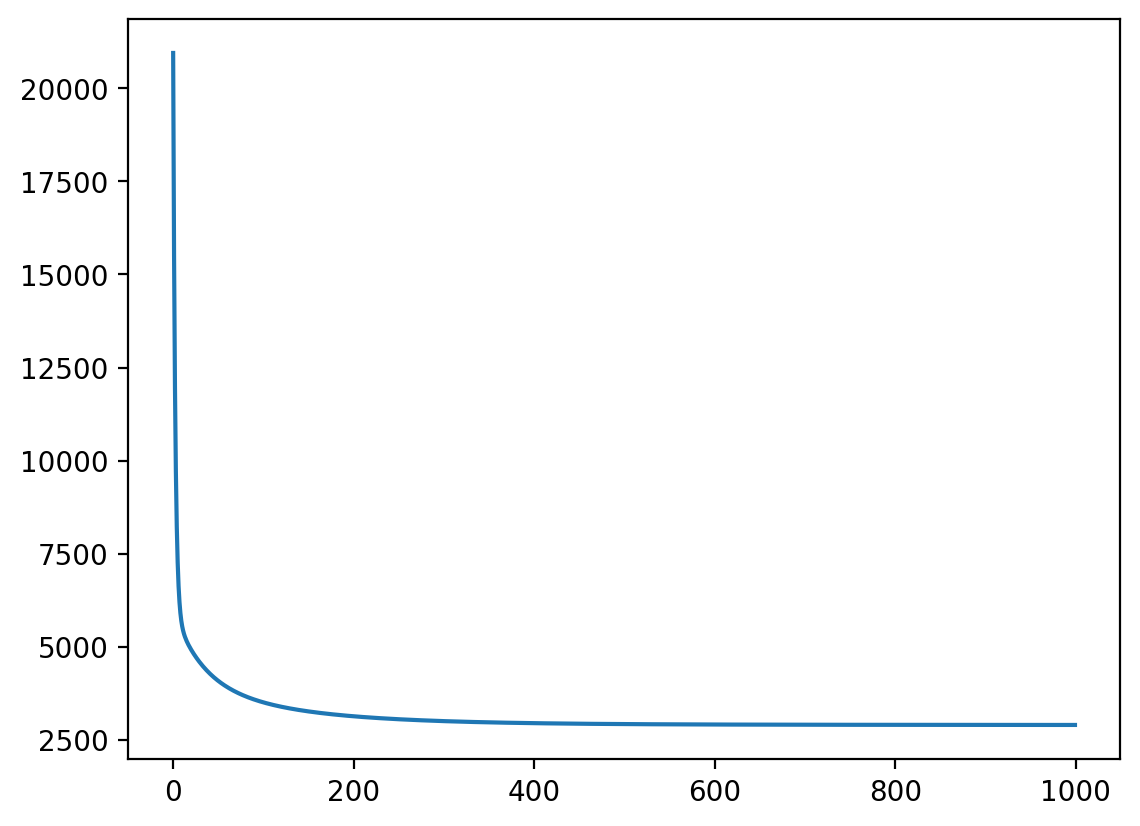

In [203]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [204]:
W, b

(array([  39.65537922, -234.55251583,  547.1927127 ,  339.35954786,
         -94.18705167, -128.40349692, -217.05018342,  147.86999136,
         407.11657781,   76.74443419]),
 151.306178944257)

##1-7. Verify performance of test data

In [205]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2878.7198579947017

##1-8. Visualization of predicted and real data
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화
- 첫번째 컬럼은 age

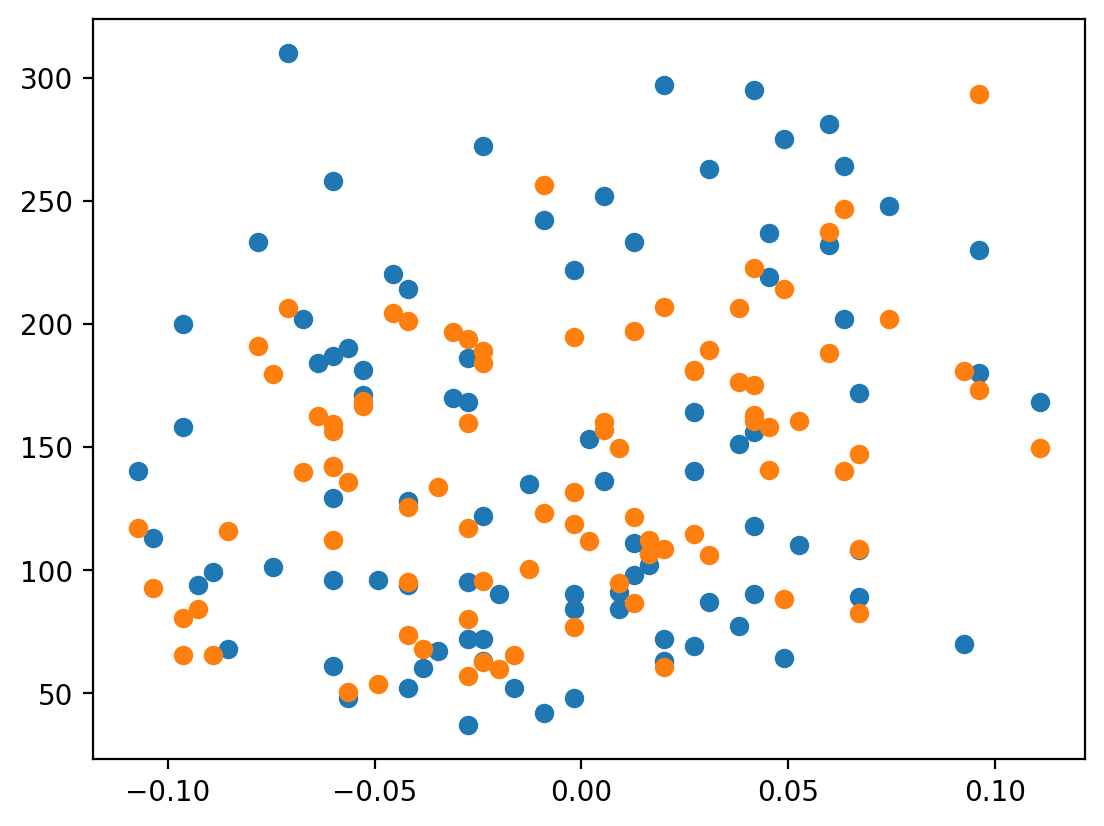

In [206]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 잘 섞여 있군

##1-9. Various Combinations of features
- feature of dataset
    - age age in years
    - sex
    - bmi body mass index
    - bp average blood pressure
    - s1 tc, total serum cholesterol
    - s2 ldl, low-density lipoproteins
    - s3 hdl, high-density lipoproteins
    - s4 tch, total cholesterol / HDL
    - s5 ltg, possibly log of serum triglycerides level
    - s6 glu, blood sugar level  

- 다 중요해 보이는 데 뭘 뺀단 말인가..   
    - 변수와 타겟 사이의 그래프를 그려보면 어떤 걸 제외할 지 보이겠지 
    - 상관관계가 있어 보이는 거 하나 없어 보이는 거 하나씩 빼서 MSE 결과 비교해보자...
- 결과 
    - hdl은 상관 없어보임. 빼보자. => 빼도 MSE가 바뀌지 않음 진짜 상관없나봐
    - 성별도 빼보자 => 뺐더니 MSE가 커졌음. underfitting 안좋은 모델이 되어버렸음. MSE ~3% 차이..


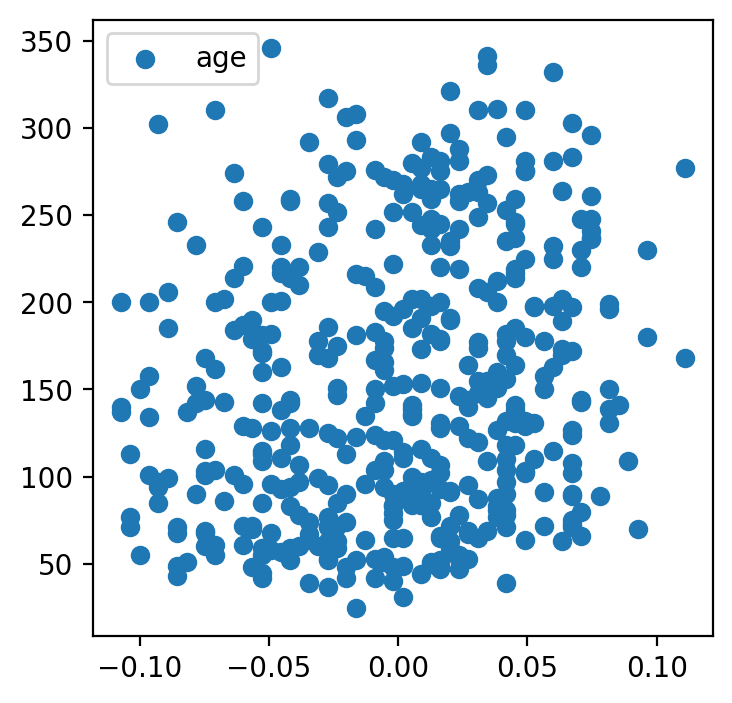

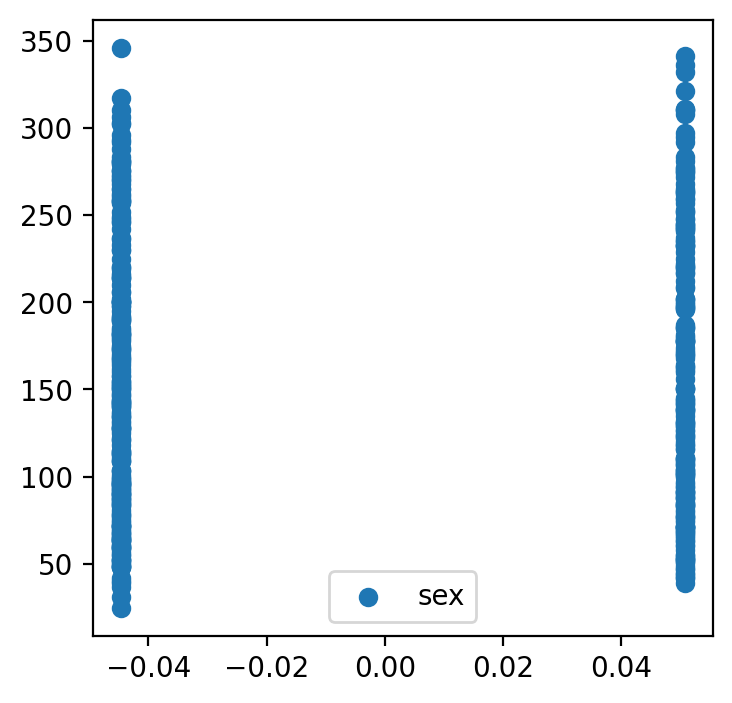

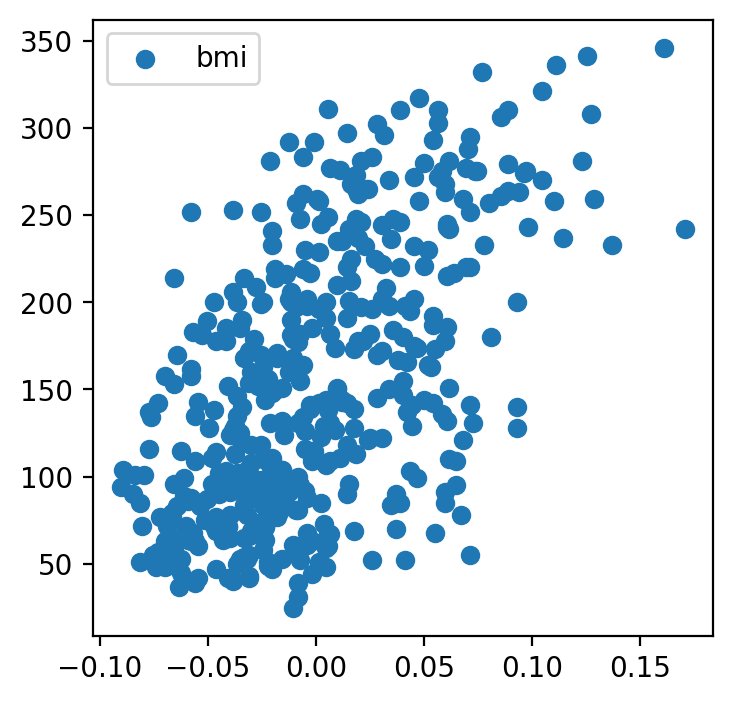

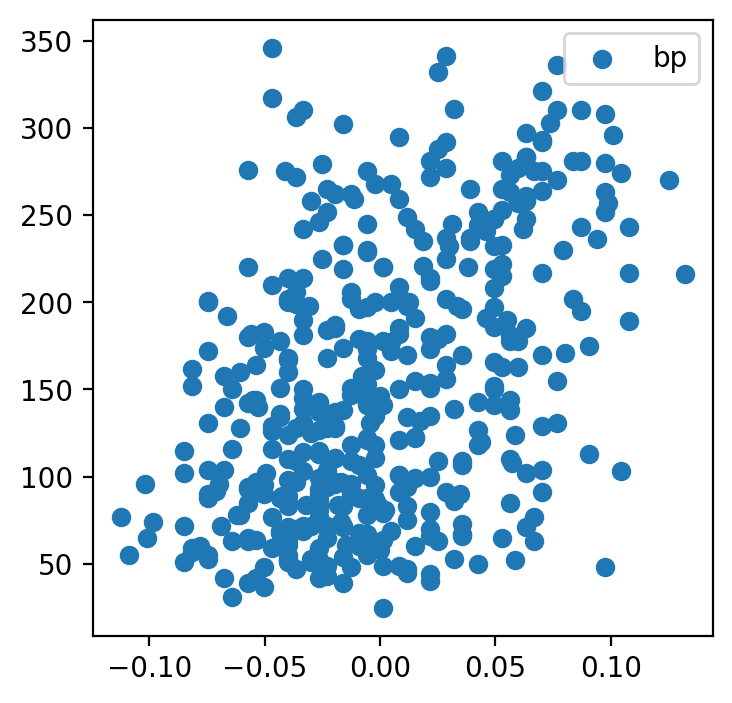

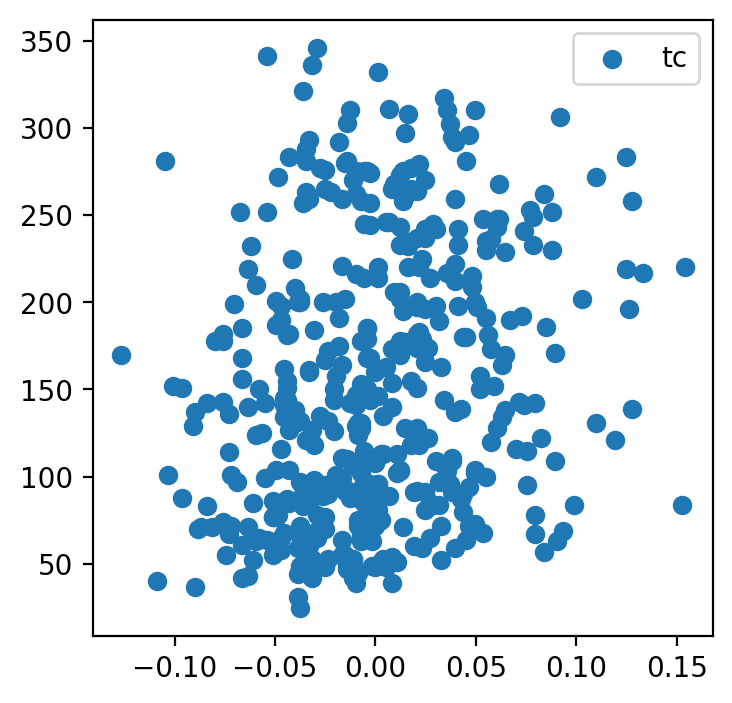

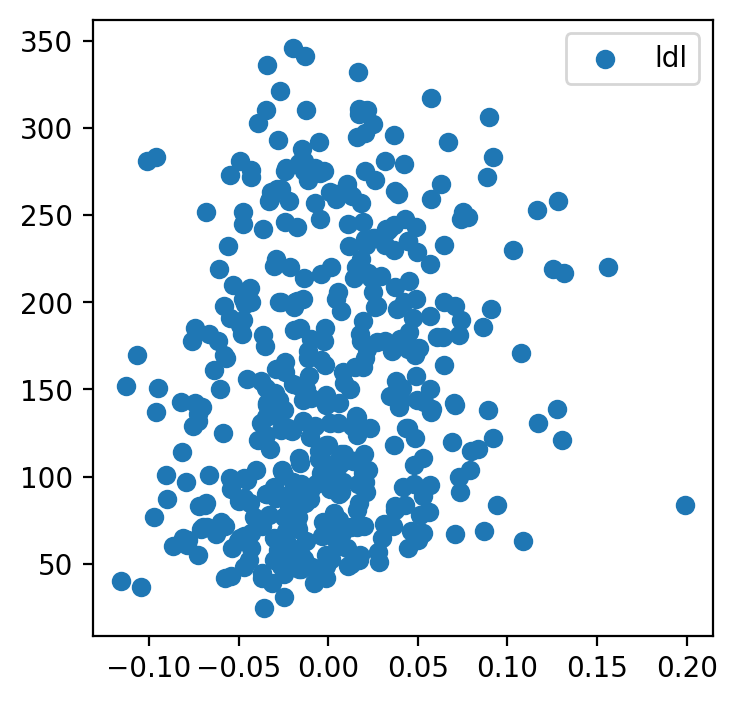

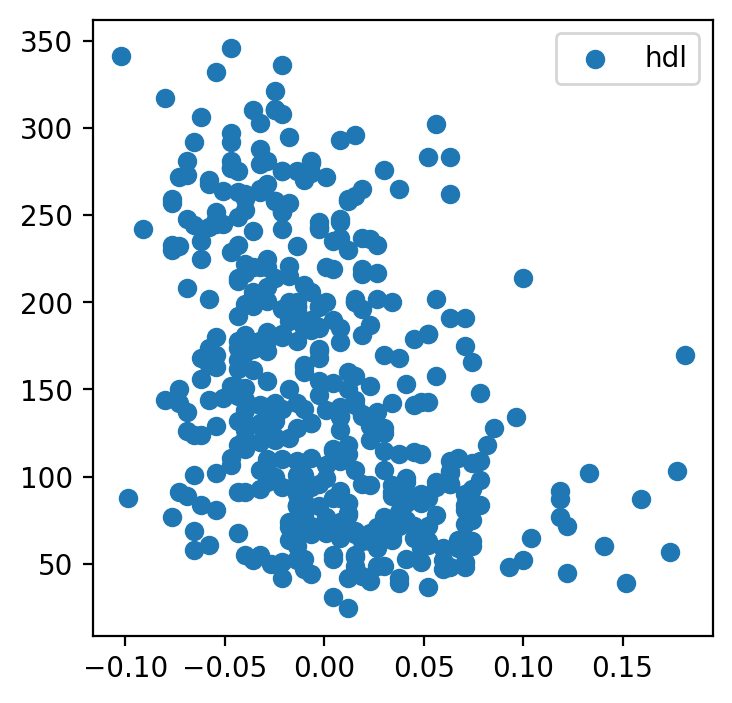

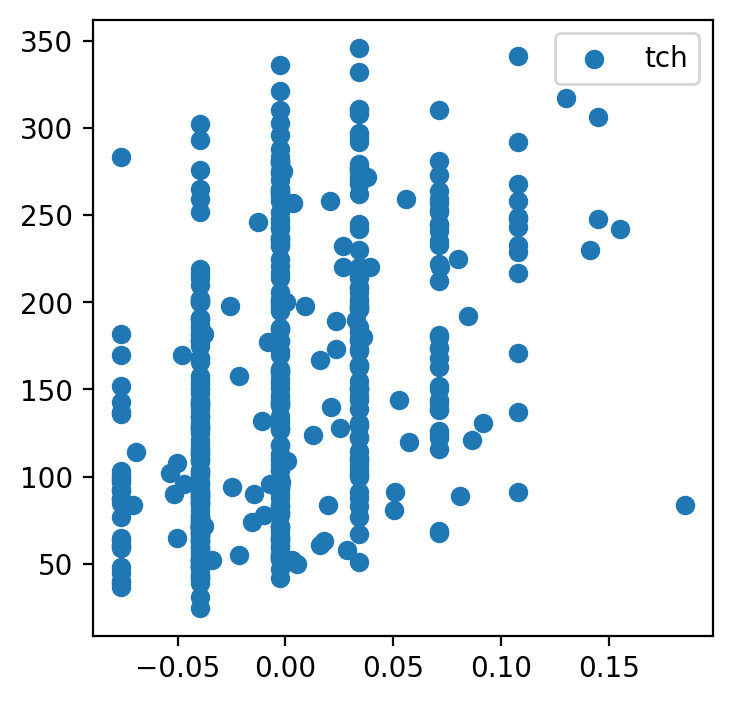

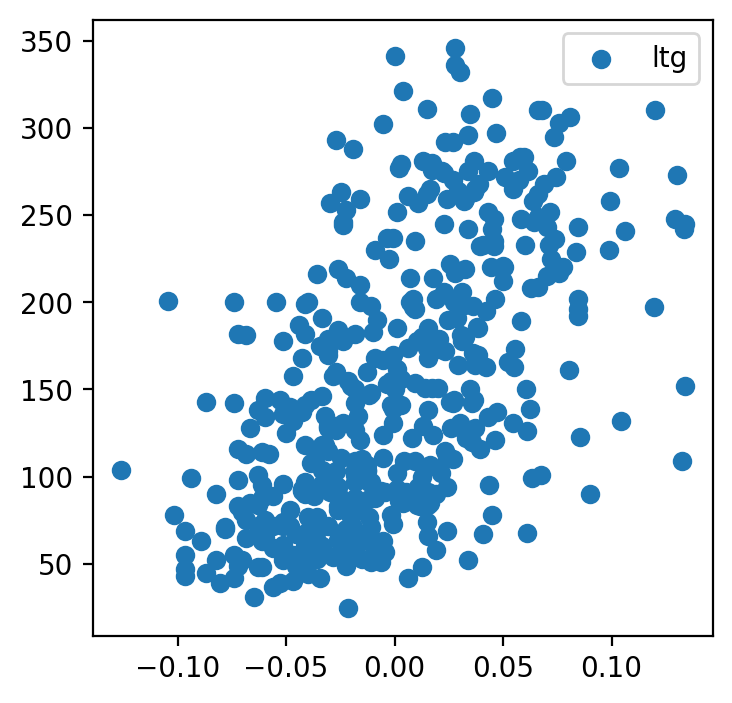

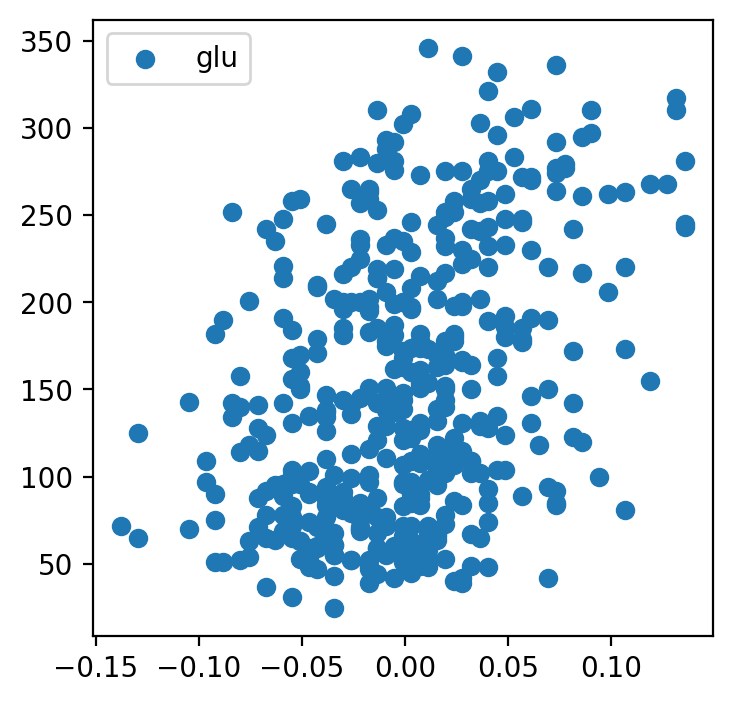

In [207]:
#변수와 타겟 간의 상관 관계를 보자.
#visualization of DATA
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
# %matplotlib inline 
# %config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

j=0
for i in ['age','sex','bmi','bp','tc','ldl','hdl', 'tch','ltg', 'glu']:
    plt.figure(figsize=(4,4))
    plt.scatter(df_X[:,j], df_y, label = i)
    j +=1
    
    plt.legend()
    plt.show()
# bmi, bp, tch, ㅣtg, glu에서 상관관계가 양의 상관관계가 보임.  그 중 bmi가 가장 큰 상관관계로 보임.

### 1-9-a. except for hdl
- Split, model, learning, loss, visualization

In [208]:
#7번째 열 빼기
df_X_1 = np.delete(df_X, 6, axis = 1)
df_X_1.shape

(442, 9)

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_1, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 9) (353,) (89, 9) (89,)


In [210]:
import numpy as np
W = np.random.rand(9)  #변수 특성값의 개수가 9개이므로 9개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.31557987, 0.42346298, 0.19309111, 0.99833084, 0.5338552 ,
        0.880462  , 0.9628318 , 0.07599564, 0.95513371]),
 0.8939158563123929)

In [211]:
#모델함수 
def model_1(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [212]:
#Define MSE
def MSE_1(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_1(X, W, b, y):
    predictions = model_1(X, W, b)
    L = MSE_1(predictions, y)
    return L
print('<3')

<3
<3


In [213]:
#Define gradient function
def gradient_1(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_1(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [214]:
dW, db = gradient_1(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37054171 -0.31236011 -4.2908777  -3.22597089 -1.54280831 -1.26649376
  2.89182027 -3.14712872 -4.13726533 -2.7960764 ]
db: -302.4791366131671


In [215]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [216]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_1(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_1(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5759.5244
Iteration 20 : Loss 5053.1291
Iteration 30 : Loss 4707.4829
Iteration 40 : Loss 4438.0857
Iteration 50 : Loss 4224.0082
Iteration 60 : Loss 4051.9130
Iteration 70 : Loss 3911.9061
Iteration 80 : Loss 3796.6090
Iteration 90 : Loss 3700.5010
Iteration 100 : Loss 3619.4354
Iteration 110 : Loss 3550.2827
Iteration 120 : Loss 3490.6686
Iteration 130 : Loss 3438.7804
Iteration 140 : Loss 3393.2237
Iteration 150 : Loss 3352.9177
Iteration 160 : Loss 3317.0166
Iteration 170 : Loss 3284.8518
Iteration 180 : Loss 3255.8896
Iteration 190 : Loss 3229.6989
Iteration 200 : Loss 3205.9272
Iteration 210 : Loss 3184.2835
Iteration 220 : Loss 3164.5243
Iteration 230 : Loss 3146.4439
Iteration 240 : Loss 3129.8667
Iteration 250 : Loss 3114.6413
Iteration 260 : Loss 3100.6359
Iteration 270 : Loss 3087.7352
Iteration 280 : Loss 3075.8376
Iteration 290 : Loss 3064.8525
Iteration 300 : Loss 3054.6996
Iteration 310 : Loss 3045.3065
Iteration 320 : Loss 3036.6085
Iteration 330 : L

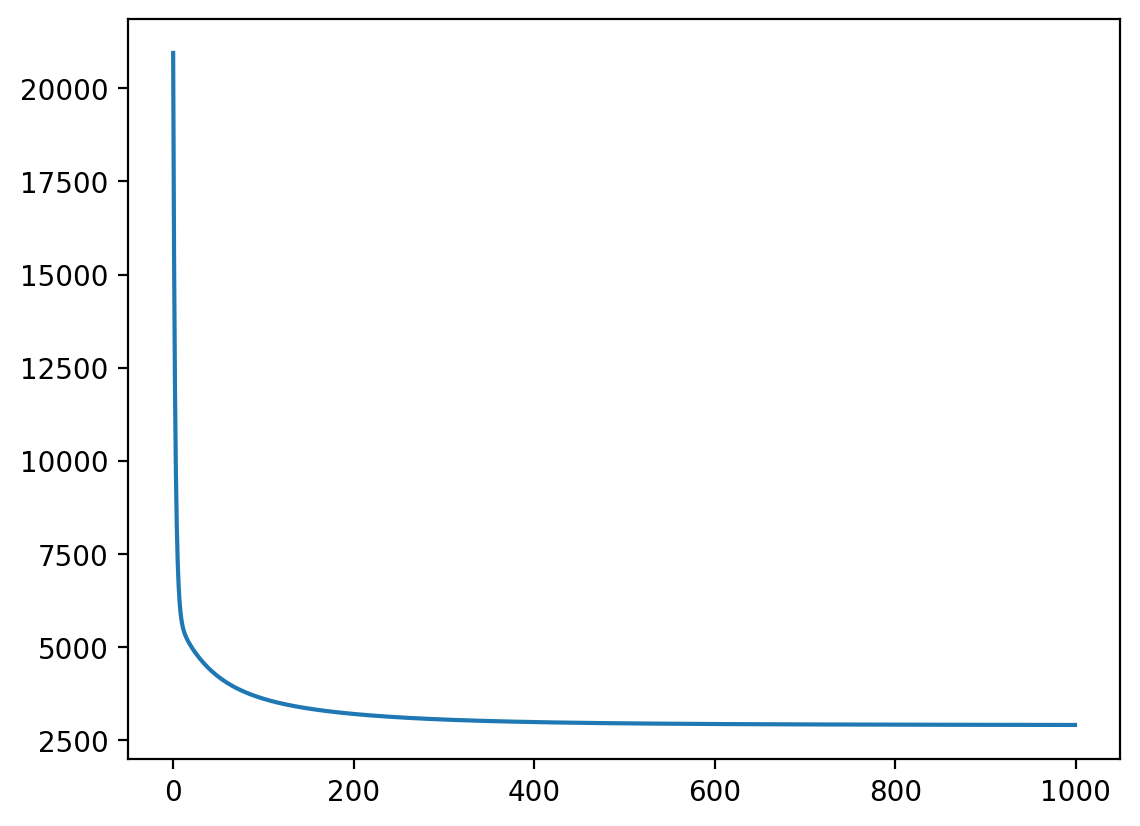

In [217]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [218]:
W, b

(array([  29.67807045, -205.28597053,  573.38325497,  330.65052925,
        -206.35784955, -114.75576828,  308.10148124,  431.42653263,
          83.59342443]),
 151.34051041506666)

In [219]:
prediction = model_1(X_test, W, b)
mse = loss_1(X_test, W, b, y_test)
mse # MSE가 다르지 않음. 오캄의 면도날 이론에 따르면 결과가 같으면 더 적은 피쳐를 선택하는 것이 맞음.

2878.001675865226

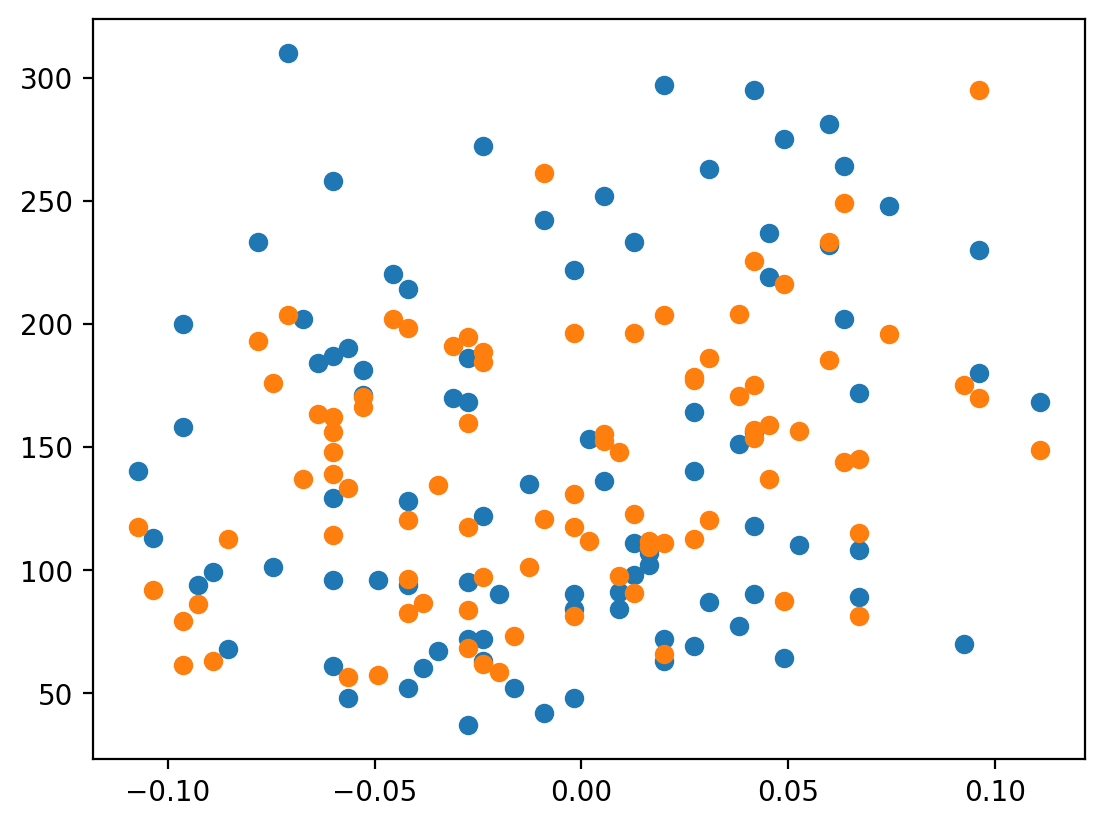

In [220]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 잘 섞여 있군 여기도 첫번째 컬럼은 age

### 1-9-b. except for hdl, age, tc, ldl
- Split, model, learning, loss, visualization

In [221]:
#1,5,6번째 열 빼기
df_X_3 = np.delete(df_X_1, 5, axis = 1)
df_X_3 = np.delete(df_X_3, 4, axis = 1)
df_X_3 = np.delete(df_X_3, 0, axis = 1) #한꺼번에 어떻게 뺌? 앞에서부터 빼면 열 번호가 달라지니 뒤에서부터 뺐음.
df_X_3.shape

(442, 6)

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_3, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 6) (353,) (89, 6) (89,)


In [223]:
import numpy as np
W = np.random.rand(6)  #변수 특성값의 개수가 9개이므로 9개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.20861019, 0.18643282, 0.55108676, 0.96092508, 0.24766434,
        0.2568152 ]),
 0.5260416692248675)

In [224]:
#모델함수 
def model_1(X, W, b):
    predictions = 0
    for i in range(6):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [225]:
#Define MSE
def MSE_1(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_1(X, W, b, y):
    predictions = model_1(X, W, b)
    L = MSE_1(predictions, y)
    return L
print('<3')

<3
<3


In [226]:
#Define gradient function
def gradient_1(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_1(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [227]:
dW, db = gradient_1(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.3728373  -0.31297346 -4.29104178 -3.22776842 -1.5490726  -1.27109119
  2.88980682 -3.14931777 -4.14126485 -2.79808328]
db: -303.21488498734215


In [228]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [229]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_1(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_1(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5796.7696
Iteration 20 : Loss 5095.1950
Iteration 30 : Loss 4742.3676
Iteration 40 : Loss 4459.8674
Iteration 50 : Loss 4231.2139
Iteration 60 : Loss 4045.6420
Iteration 70 : Loss 3894.5966
Iteration 80 : Loss 3771.2551
Iteration 90 : Loss 3670.1736
Iteration 100 : Loss 3587.0060
Iteration 110 : Loss 3518.2805
Iteration 120 : Loss 3461.2218
Iteration 130 : Loss 3413.6094
Iteration 140 : Loss 3373.6653
Iteration 150 : Loss 3339.9640
Iteration 160 : Loss 3311.3616
Iteration 170 : Loss 3286.9383
Iteration 180 : Loss 3265.9539
Iteration 190 : Loss 3247.8113
Iteration 200 : Loss 3232.0280
Iteration 210 : Loss 3218.2131
Iteration 220 : Loss 3206.0490
Iteration 230 : Loss 3195.2773
Iteration 240 : Loss 3185.6866
Iteration 250 : Loss 3177.1036
Iteration 260 : Loss 3169.3858
Iteration 270 : Loss 3162.4150
Iteration 280 : Loss 3156.0934
Iteration 290 : Loss 3150.3392
Iteration 300 : Loss 3145.0838
Iteration 310 : Loss 3140.2692
Iteration 320 : Loss 3135.8465
Iteration 330 : L

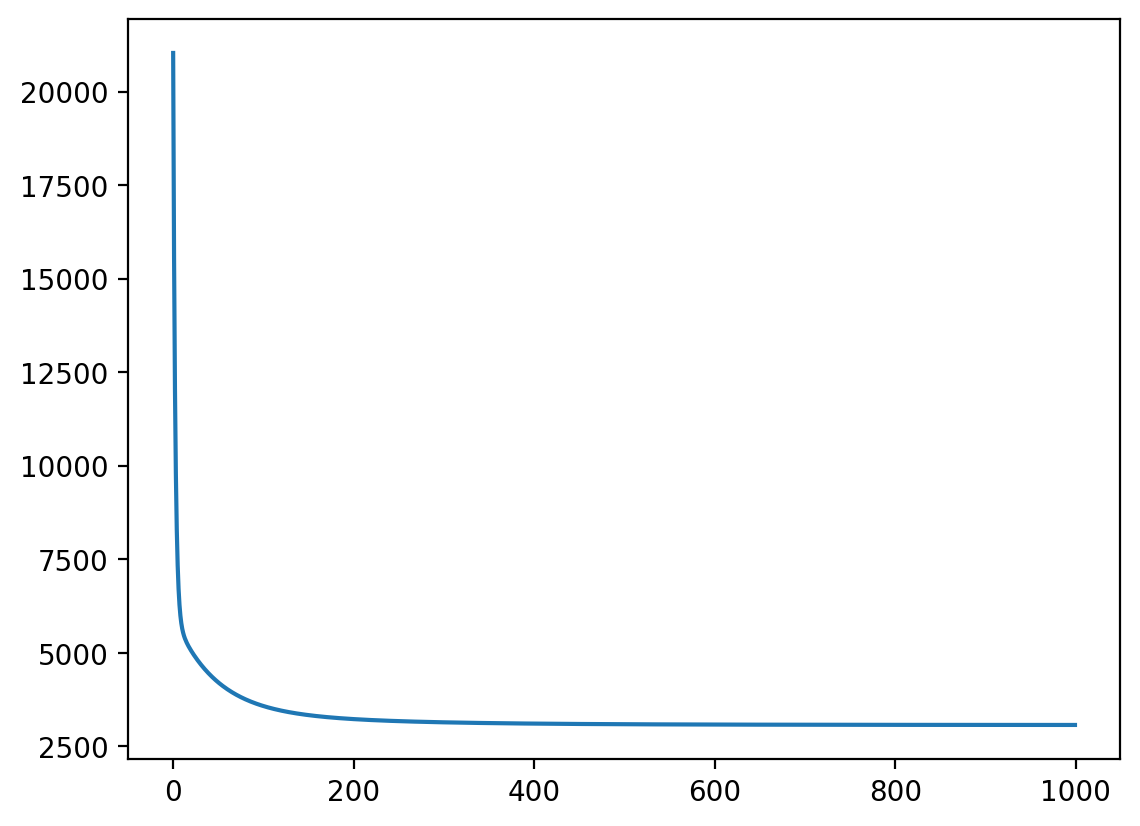

In [230]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [231]:
W, b

(array([-176.50244321,  573.56899273,  320.97935935,  174.88618918,
         388.84205726,   65.56555768]),
 151.7322363356282)

In [232]:
prediction = model_1(X_test, W, b)
mse = loss_1(X_test, W, b, y_test)
mse # MSE가 2% 감소.

2819.896763804996

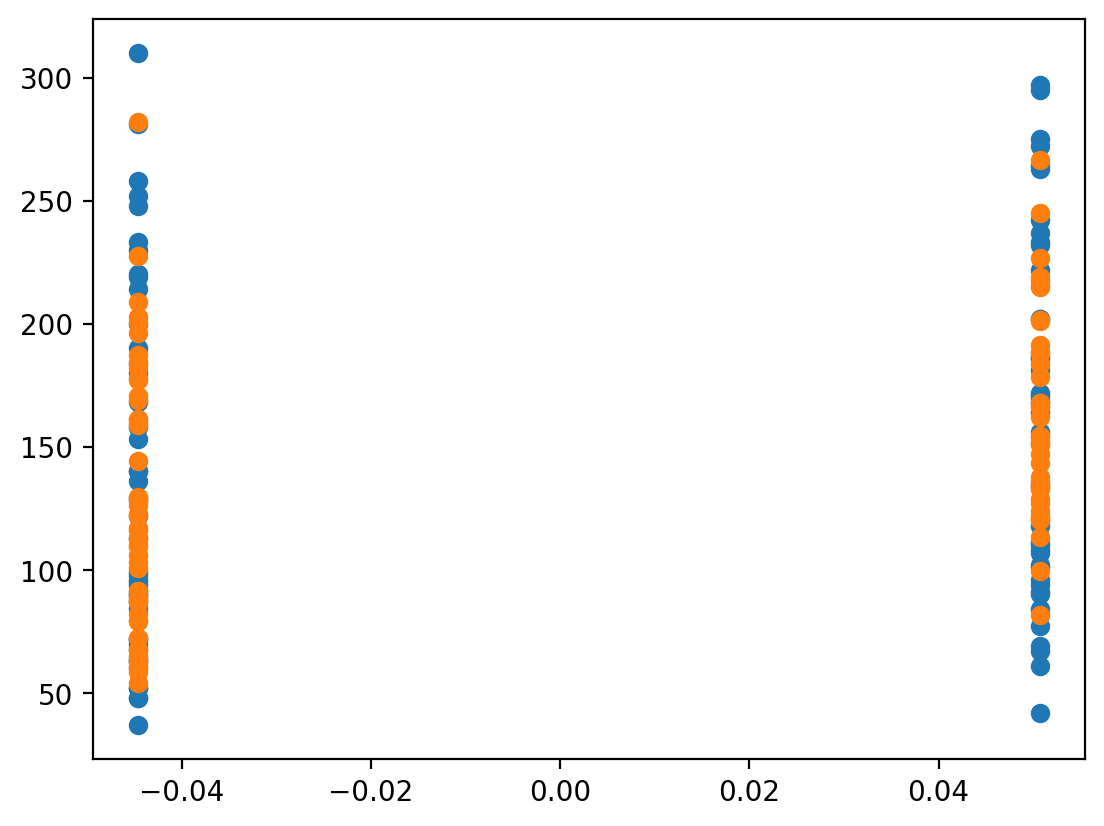

In [233]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 왜 이런 모양? 첫번째가 sex이기 때문에 범주형 

### 1-9-c. except for hdl, age, tc, ldl & sex
- Split, model, learning, loss, visualization

In [234]:
#1-9-a dataset의 2번째 열 빼기
df_X_2 = np.delete(df_X_3, 0, axis = 1)

df_X_2.shape

(442, 5)

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_2, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 5) (353,) (89, 5) (89,)


In [236]:
import numpy as np
W = np.random.rand(5)  #변수 특성값의 개수가 8개이므로 8개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.51466099, 0.23738476, 0.6743197 , 0.45778582, 0.46402175]),
 0.8525751070648534)

In [237]:
#모델함수 
def model_2(X, W, b):
    predictions = 0
    for i in range(5):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [238]:
#Define MSE
def MSE_2(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_2(X, W, b, y):
    predictions = model_2(X, W, b)
    L = MSE_2(predictions, y)
    return L
print('<3')

<3
<3


In [239]:
#Define gradient function
def gradient_2(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_2(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [240]:
dW, db = gradient_2(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37207302 -0.31313306 -4.2911667  -3.22928275 -1.54918003 -1.27131571
  2.89009647 -3.14955068 -4.14136762 -2.7983084 ]
db: -302.56181811166215


In [241]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [242]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_2(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_2(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5794.7607
Iteration 20 : Loss 5094.5786
Iteration 30 : Loss 4742.3938
Iteration 40 : Loss 4461.0050
Iteration 50 : Loss 4233.9635
Iteration 60 : Loss 4050.4720
Iteration 70 : Loss 3901.9140
Iteration 80 : Loss 3781.3913
Iteration 90 : Loss 3683.3801
Iteration 100 : Loss 3603.4569
Iteration 110 : Loss 3538.0783
Iteration 120 : Loss 3484.4059
Iteration 130 : Loss 3440.1650
Iteration 140 : Loss 3403.5323
Iteration 150 : Loss 3373.0461
Iteration 160 : Loss 3347.5338
Iteration 170 : Loss 3326.0543
Iteration 180 : Loss 3307.8522
Iteration 190 : Loss 3292.3205
Iteration 200 : Loss 3278.9712
Iteration 210 : Loss 3267.4115
Iteration 220 : Loss 3257.3251
Iteration 230 : Loss 3248.4568
Iteration 240 : Loss 3240.6006
Iteration 250 : Loss 3233.5897
Iteration 260 : Loss 3227.2891
Iteration 270 : Loss 3221.5890
Iteration 280 : Loss 3216.4000
Iteration 290 : Loss 3211.6492
Iteration 300 : Loss 3207.2767
Iteration 310 : Loss 3203.2332
Iteration 320 : Loss 3199.4783
Iteration 330 : L

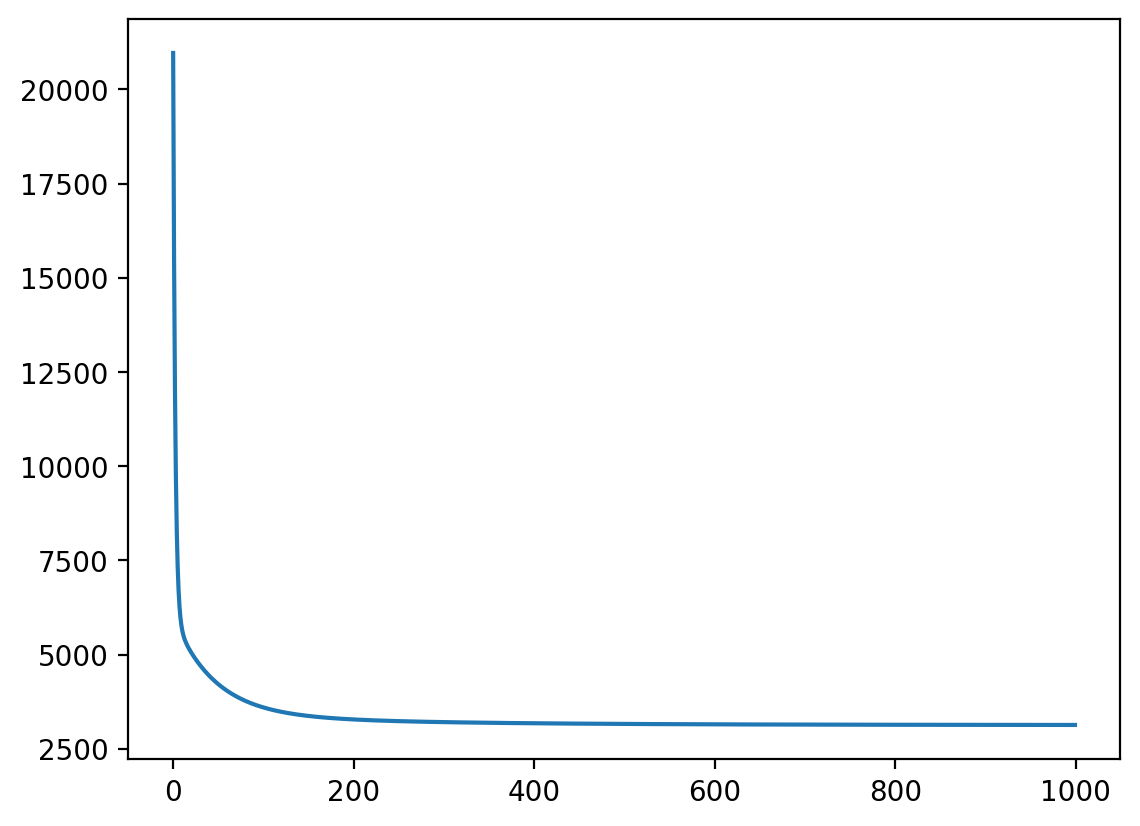

In [243]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [244]:
W, b

(array([594.93353919, 295.90117627, 119.90293159, 401.96119214,
         54.9585928 ]),
 151.71709969415323)

In [245]:
prediction = model_2(X_test, W, b)
mse = loss_2(X_test, W, b, y_test)
mse # 더 커졌네 언더피팅 sex는 들어가야 하는 것이 맞는가 봄.

2908.583536367071

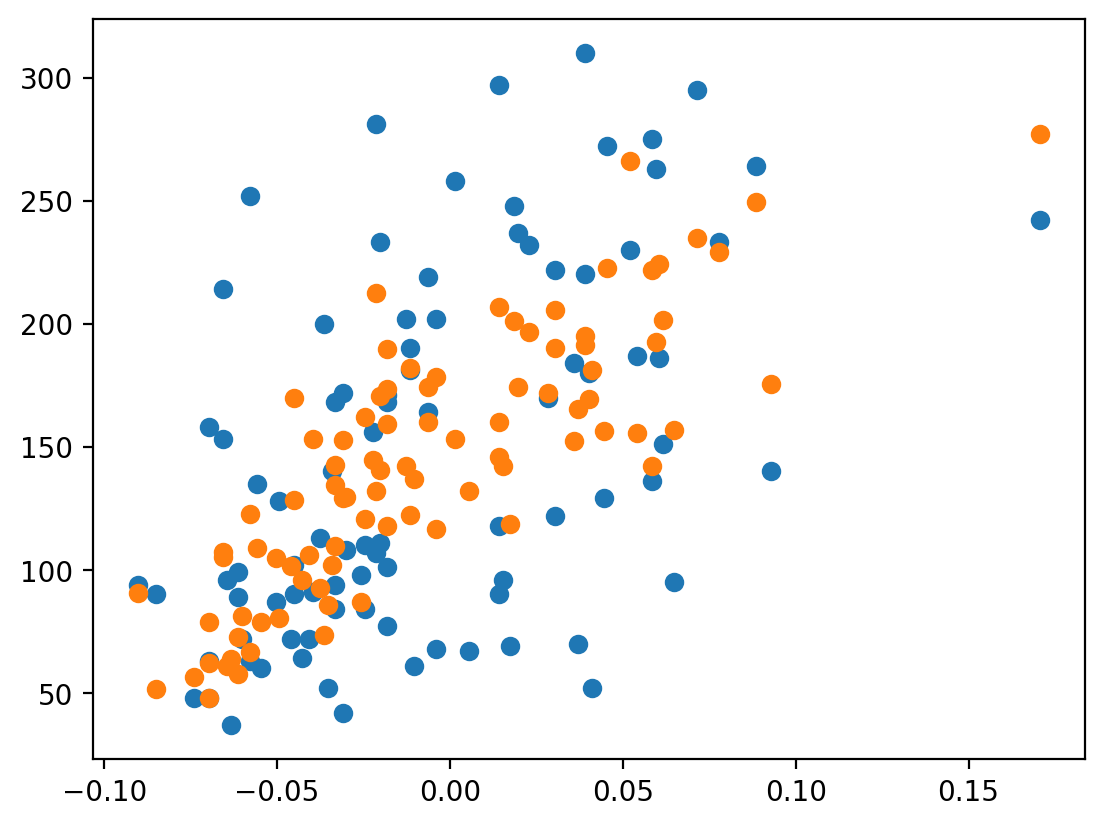

In [246]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 첫번째 컬럼이이 bmi

### 1-9-d. except for hdl, age, tc, ldl & bmi
- Split, model, learning, loss, visualization

In [247]:
#1-9-a dataset의 2번째 열 빼기
df_X_4 = np.delete(df_X_3, 1, axis = 1)

df_X_4.shape

(442, 5)

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_4, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 5) (353,) (89, 5) (89,)


In [249]:
import numpy as np
W = np.random.rand(5)  #변수 특성값의 개수가 8개이므로 8개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.1545394 , 0.40841517, 0.1611671 , 0.61129219, 0.83364287]),
 0.7525449785260124)

In [250]:
#모델함수 
def model_2(X, W, b):
    predictions = 0
    for i in range(5):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [251]:
#Define MSE
def MSE_2(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_2(X, W, b, y):
    predictions = model_2(X, W, b)
    L = MSE_2(predictions, y)
    return L
print('<3')

<3
<3


In [252]:
#Define gradient function
def gradient_2(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_2(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [253]:
dW, db = gradient_2(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37332989 -0.31262057 -4.29302963 -3.22946083 -1.54831556 -1.27054047
  2.89073932 -3.14950086 -4.1415933  -2.79872555]
db: -302.7618783687399


In [254]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [255]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_2(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_2(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5952.4848
Iteration 20 : Loss 5366.1999
Iteration 30 : Loss 5097.3587
Iteration 40 : Loss 4875.8804
Iteration 50 : Loss 4691.0400
Iteration 60 : Loss 4536.4519
Iteration 70 : Loss 4406.8886
Iteration 80 : Loss 4298.0462
Iteration 90 : Loss 4206.3795
Iteration 100 : Loss 4128.9671
Iteration 110 : Loss 4063.4002
Iteration 120 : Loss 4007.6916
Iteration 130 : Loss 3960.2009
Iteration 140 : Loss 3919.5729
Iteration 150 : Loss 3884.6873
Iteration 160 : Loss 3854.6169
Iteration 170 : Loss 3828.5938
Iteration 180 : Loss 3805.9810
Iteration 190 : Loss 3786.2499
Iteration 200 : Loss 3768.9606
Iteration 210 : Loss 3753.7473
Iteration 220 : Loss 3740.3044
Iteration 230 : Loss 3728.3769
Iteration 240 : Loss 3717.7512
Iteration 250 : Loss 3708.2479
Iteration 260 : Loss 3699.7162
Iteration 270 : Loss 3692.0291
Iteration 280 : Loss 3685.0789
Iteration 290 : Loss 3678.7746
Iteration 300 : Loss 3673.0384
Iteration 310 : Loss 3667.8043
Iteration 320 : Loss 3663.0155
Iteration 330 : L

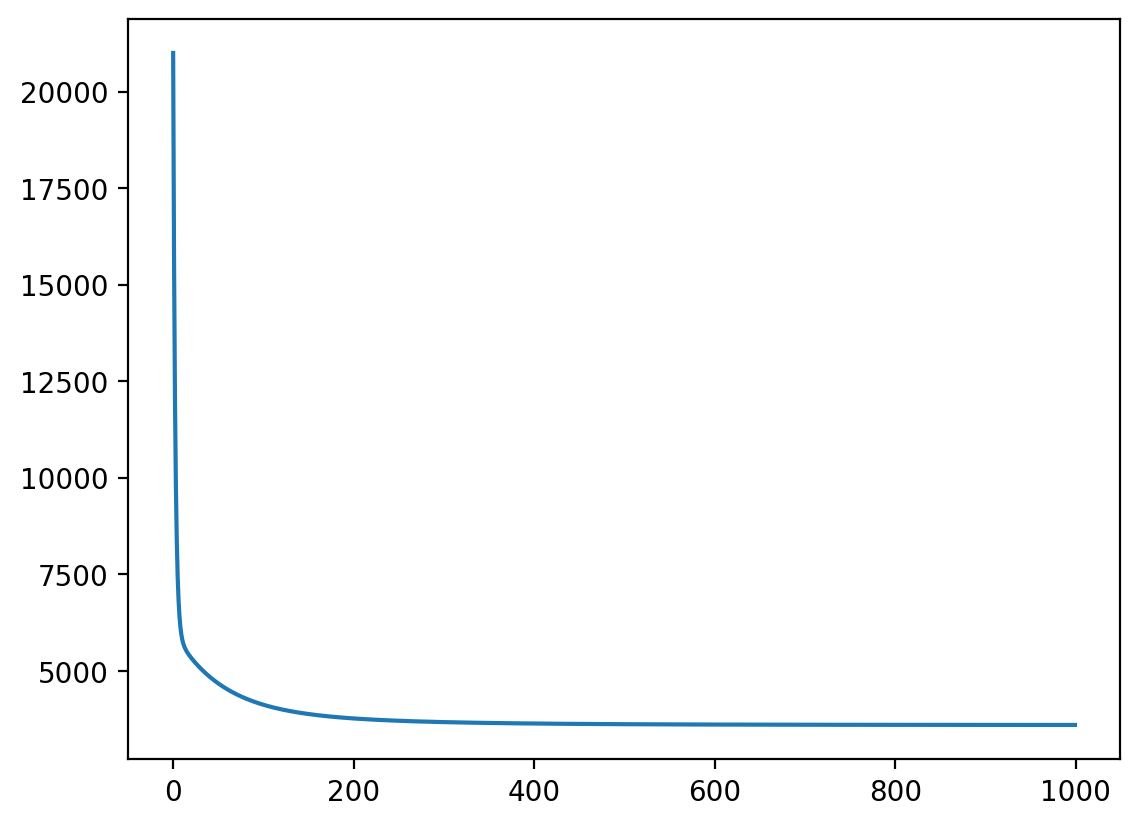

In [256]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [257]:
W, b

(array([-238.34530764,  446.99183593,  299.73490092,  495.19030316,
         151.13662104]),
 152.2523347935304)

In [258]:
prediction = model_2(X_test, W, b)
mse = loss_2(X_test, W, b, y_test)
mse # 13%나 커졌네 언더피팅. BMI는 당뇨에 큰 영향이 있음.

3198.3158843499646

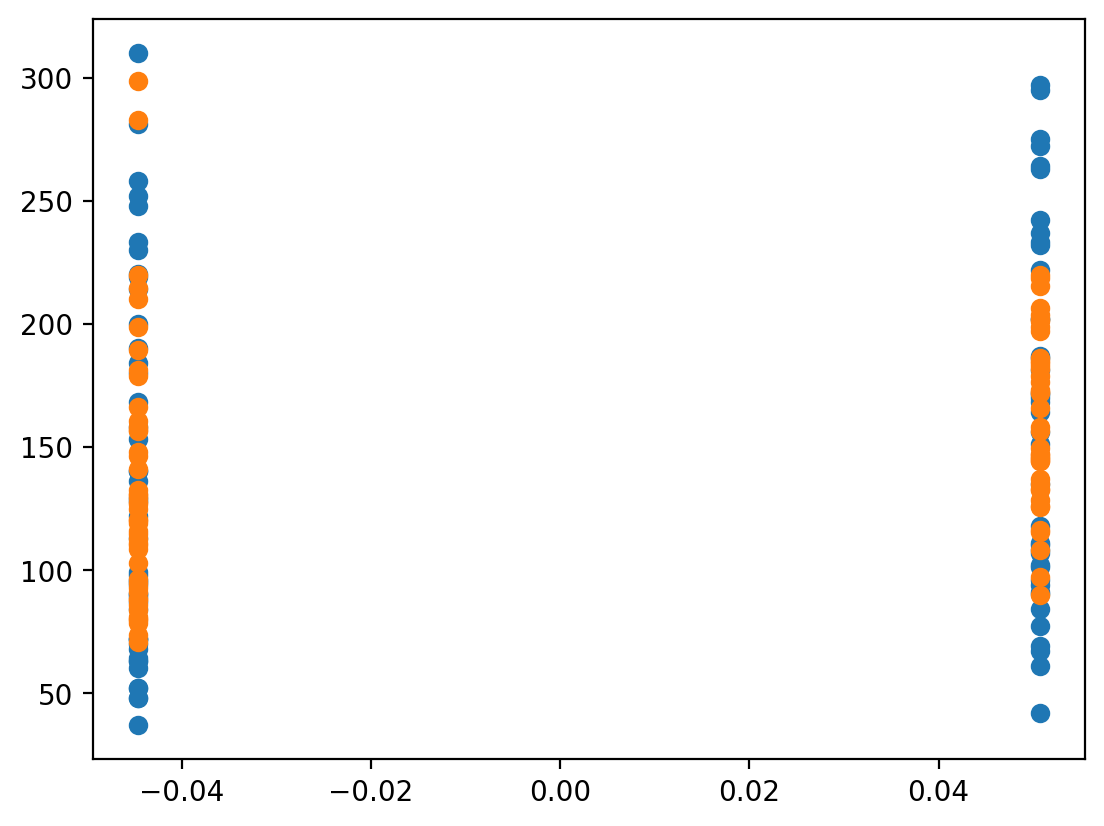

In [259]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 첫번째 컬럼이 sex

# Project 2 : Bike rider at Monday 3p.m.

- 데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

- 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?  
(1) 데이터 가져오기  https://www.kaggle.com/c/bike-sharing-demand/data  
(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기  
(3) year, month, day, hour, minute, second 데이터 개수 시각화하기  
(4) X, y 컬럼 선택 및 train/test 데이터 분리  
(5) LinearRegression 모델 학습  
(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산  
(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기  

In [260]:
#import library
import pandas as pd
import numpy as np

##2-1. Load dataset

In [261]:
#구글 드라이브 파일 접근 코랩에서 진행할 때..
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [262]:
# 데이터 호출하기

# google drive 
path = '/content/drive/MyDrive/Colab Notebooks/aiffel/data/bike/'

train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
y_test = pd.read_csv(path+'sampleSubmission.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

##2-2. datetime preprocessing
- datetime 자료형으로 변환하고 연,월,일,시,분,초 6가지 컬럼 생성

In [263]:
#datetime 타입 확인인
train.info() #datetime이 object이군

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [264]:
#datetime 자료형으로 변환 및 확인인
train['datetime']=pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [265]:
#연,월,일,시,분,초 6가지 컬럼 생성 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday #월요일 3시를 예측하니깐 필요할 거 같아 추가 사용할 일이 있을까 함. 0이 월요일일
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


##2-3. Visualization of year, month, dat, hour, minute, second

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

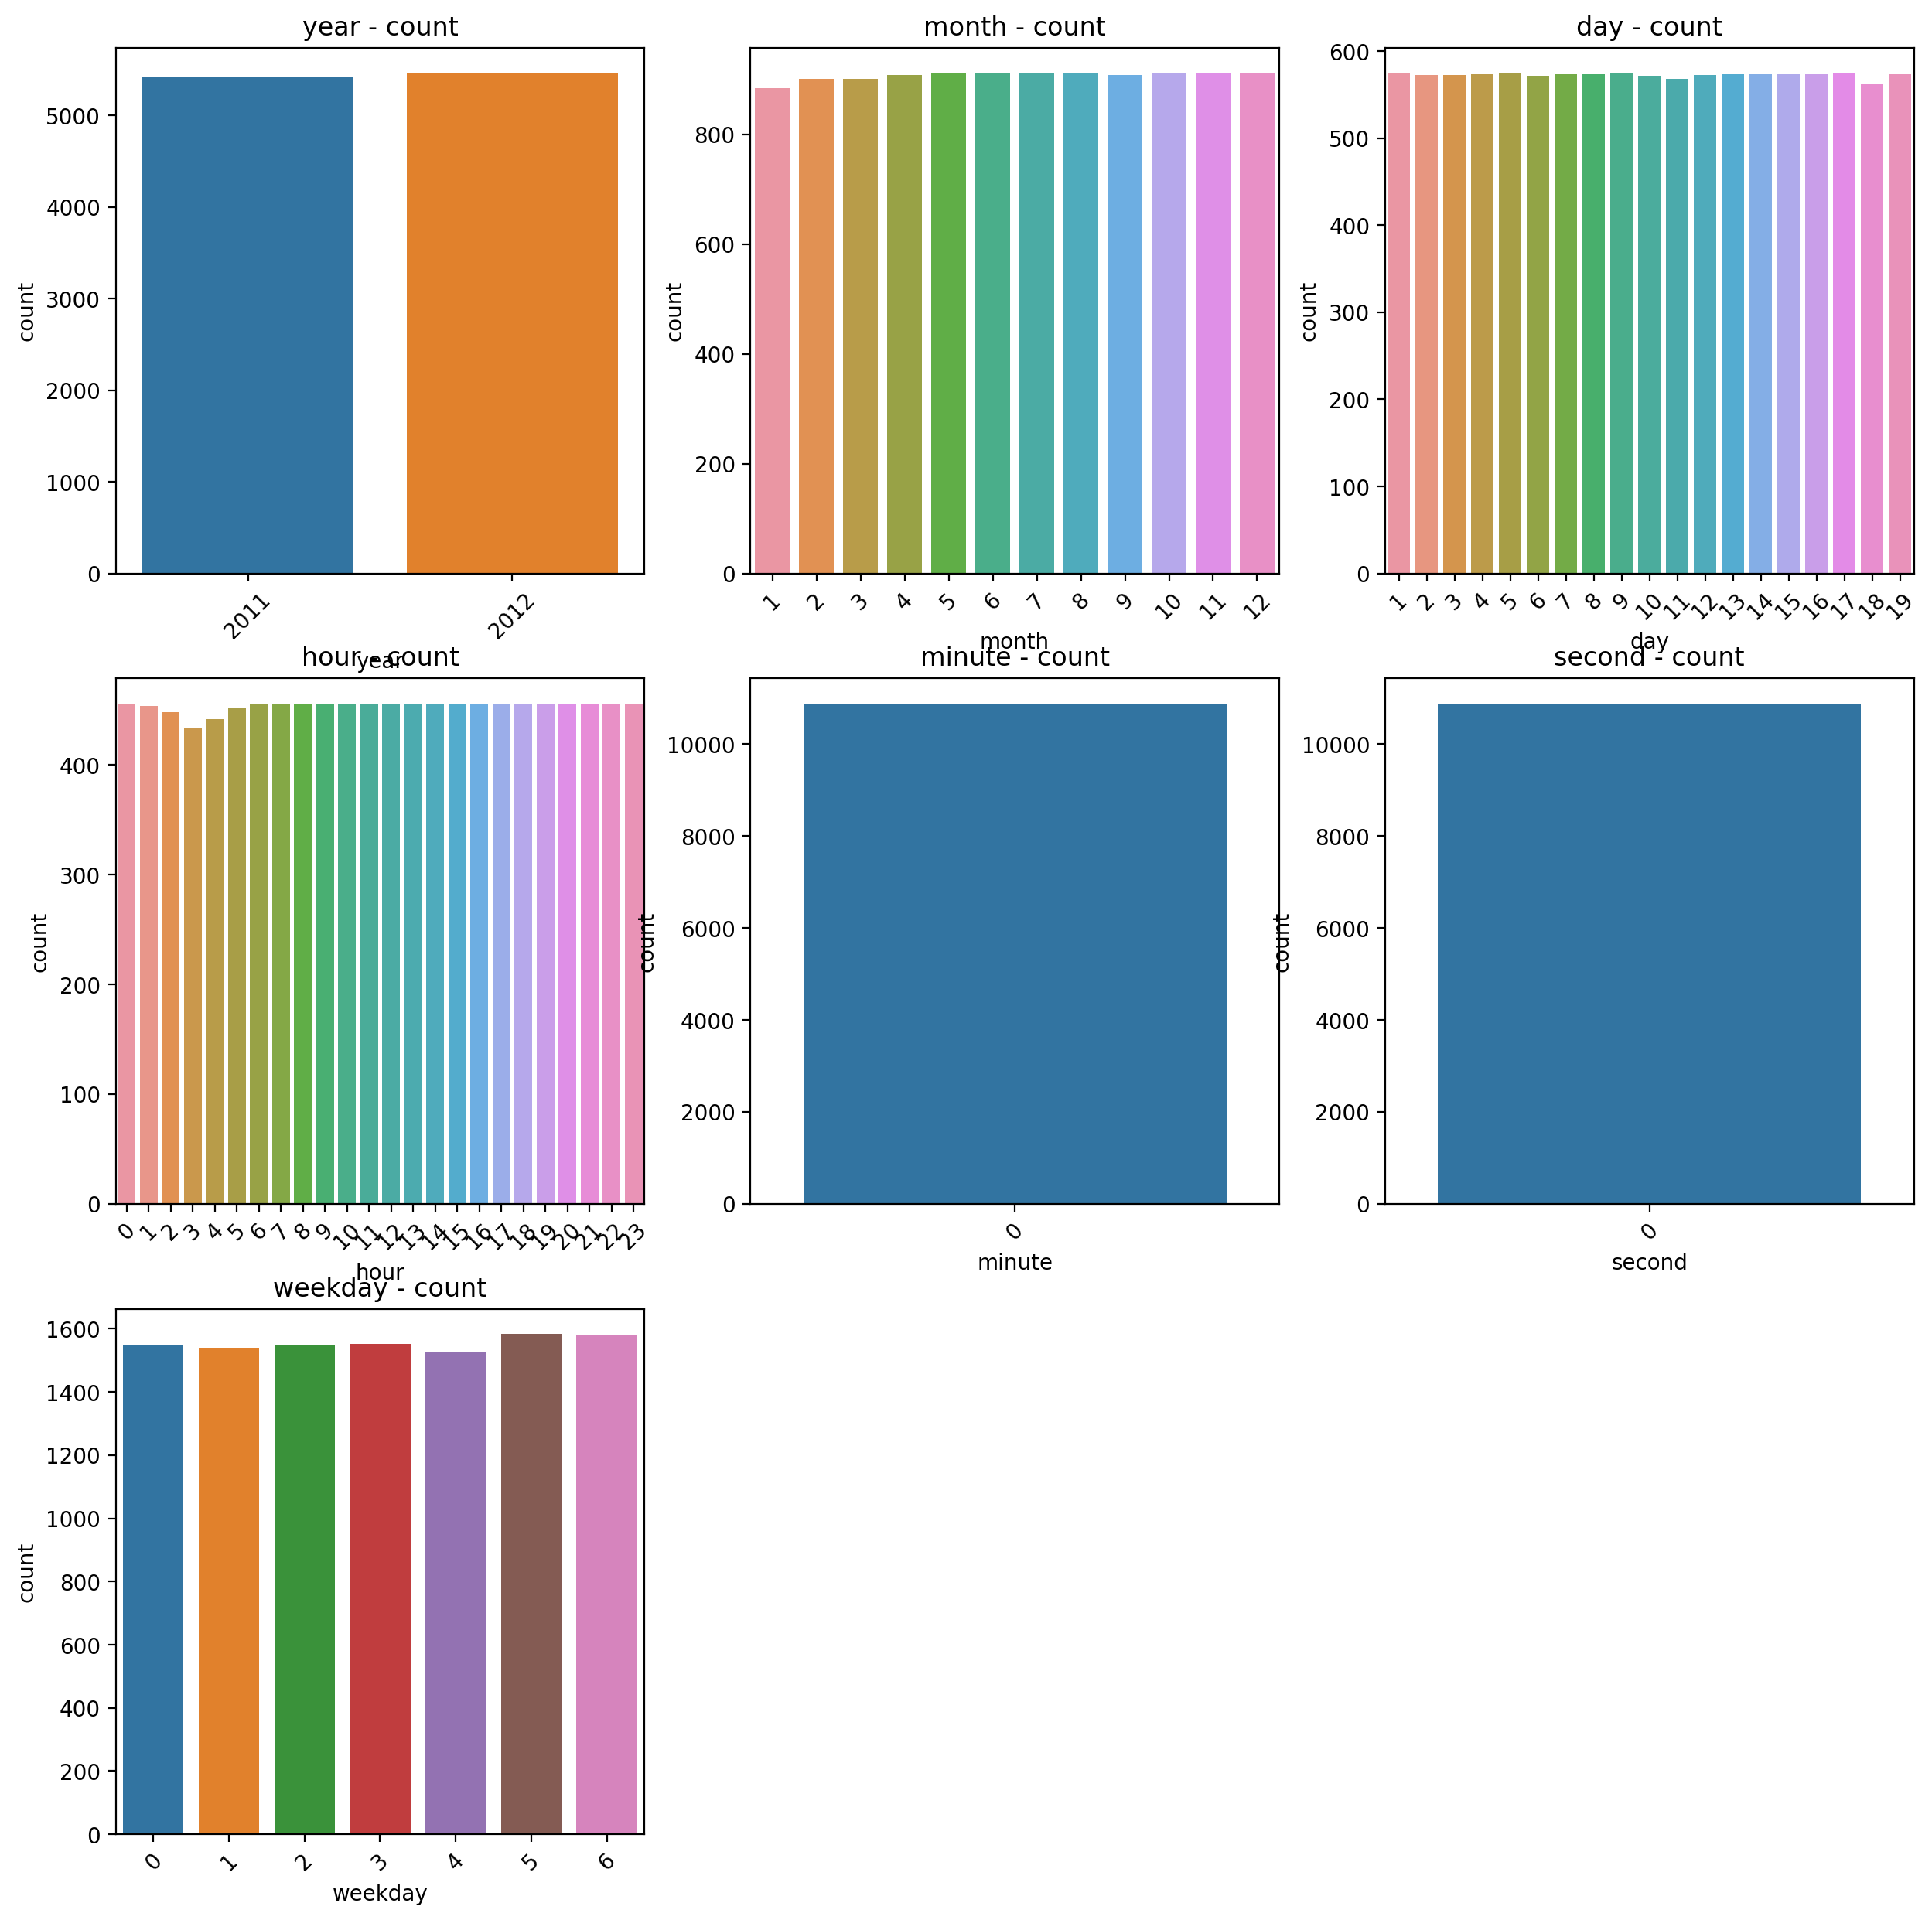

In [267]:
# sns.countplot 활용해서 시각화하기
# subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
plt.figure(figsize=(15, 15))
j=1
for i in ['year', 'month', 'day', 'hour', 'minute', 'second', 'weekday']:
    plt.subplot(3, 3, j)
    plt.title(f"{i} - count")
    sns.countplot(data=train, x=train[i])
    plt.xticks(rotation=45)
    j +=1

plt.show() # 매우 고르게 분포

In [268]:
train['hour'].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

##2-4. Split
- X, y 컬럼 선택 및 train/test 데이터 분리
    - 자전거 타는 데 변수 휴일인지 비나 눈이 오는지 너무 춥거나 덥지 않은지..
    - X : season, workingday, weather, atemp(체감온도), windspeed, month, hour => RMSE가 150이상이 나왔음.
    - 'workingday', 'temp','humidity','month', 'day', 'hour'=> RMSE 147, day에 상관없을 거 같았는데 day 넣으니 아주아주 약간 떨어짐.
    - y : count

In [269]:
#선택한 컬럼만 모으기
# X = train[['season', 'workingday', 'weather', 'atemp', 'windspeed', 'month', 'hour']]
y = train['count']
X = train[['temp','humidity','month', 'day', 'hour']] #계절, 휴일을 넣어도 빼도 RMSE 값이 크게 바뀌지 않음. 그렇다면 변수가 적은 것이 나음.
X.shape, y.shape

((10886, 5), (10886,))

In [270]:
#split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8708, 5) (8708,) (2178, 5) (2178,)


##2-5. LinearRegression 

In [271]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##2-6. prediction, MSE & RMSE

In [272]:
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
print('MSE : ', mean_squared_error(y_test, pred))
print('RMSE : ',mean_squared_error(y_test, pred)**0.5) 

MSE :  21666.419654678633
RMSE :  147.19517537840238


##2-7. Visualization of count by temp & humidity

In [273]:
X_test.head()

,temp,humidity,month,day,hour
3133,33.62,59,7,19,11
5786,4.10,54,1,16,6
5224,9.84,48,12,11,18
8953,29.52,62,8,15,10
8054,25.42,53,6,15,23


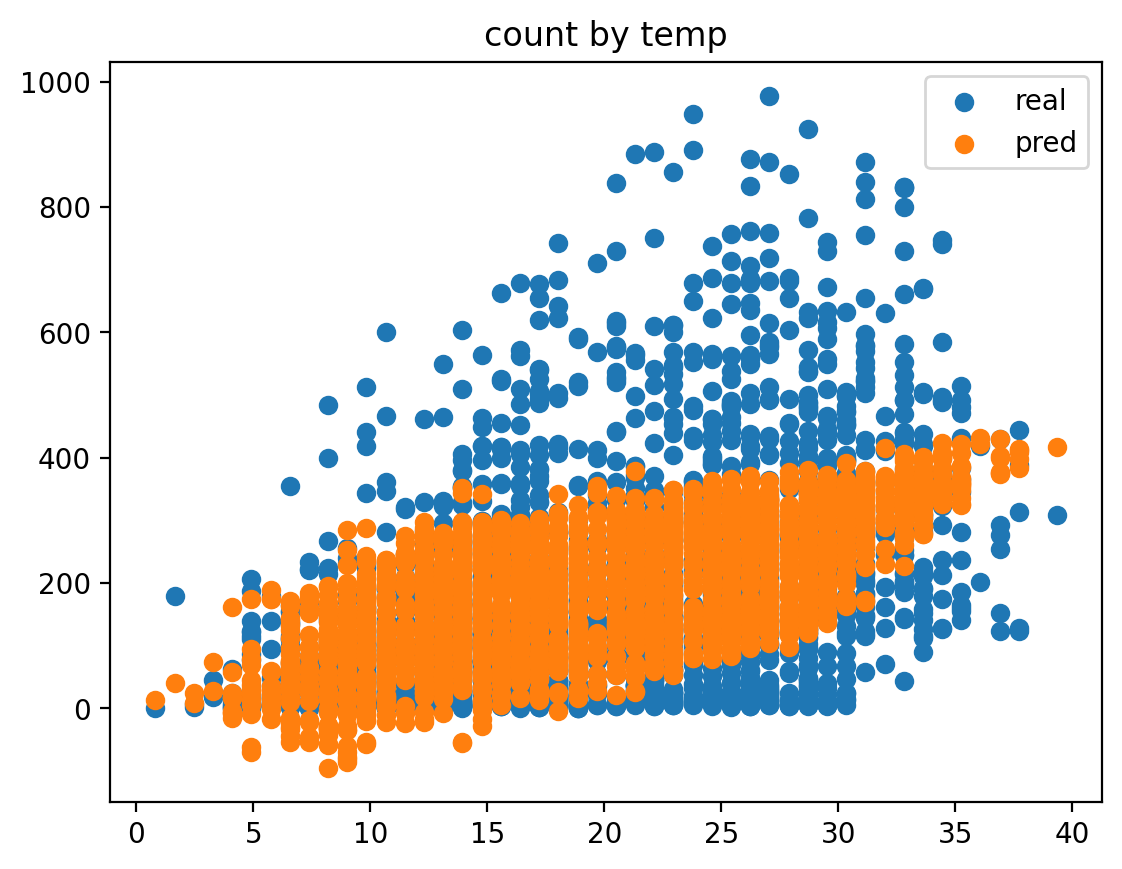

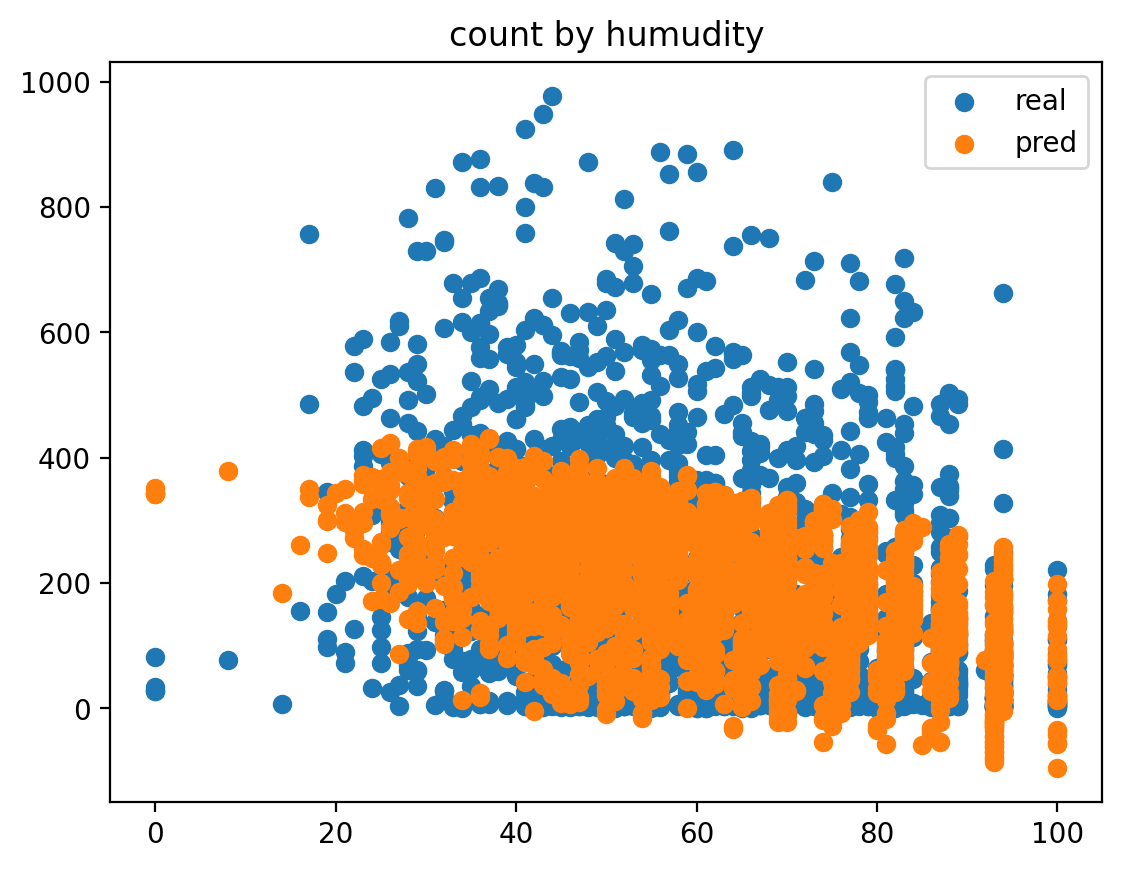

In [274]:
plt.scatter(X_test.iloc[:,0], y_test, label='real')
plt.scatter(X_test.iloc[:,0], pred, label='pred')
plt.title('count by temp')
plt.legend()

plt.show()

plt.scatter(X_test.iloc[:,1], y_test, label='real')
plt.scatter(X_test.iloc[:,1], pred, label='pred')
plt.title('count by humudity')
plt.legend()

plt.show()


# Review
그저 하라는 것만 하고 끝난 느낌...  
회귀 분석에서 model & loss의 알고리즘을 확실히..  
학습률 개념을 알 수 있다. 

